In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Data source import complete.


# Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Load the data

In [ ]:
test_data="/kaggle/input/brain-tumor-mri-dataset/Testing"
train_data="/kaggle/input/brain-tumor-mri-dataset/Training"

In [ ]:
# define some params to load
img_height=224
img_width=224
batch_size=32

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_data,
    image_size=(img_height,img_width),
    batch_size=32,
    seed=123,
)
val_ds=tf.keras.utils.image_dataset_from_directory(
    test_data,
    image_size=(img_height,img_width),
    batch_size=32,
    seed=123,
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


# visualize the data

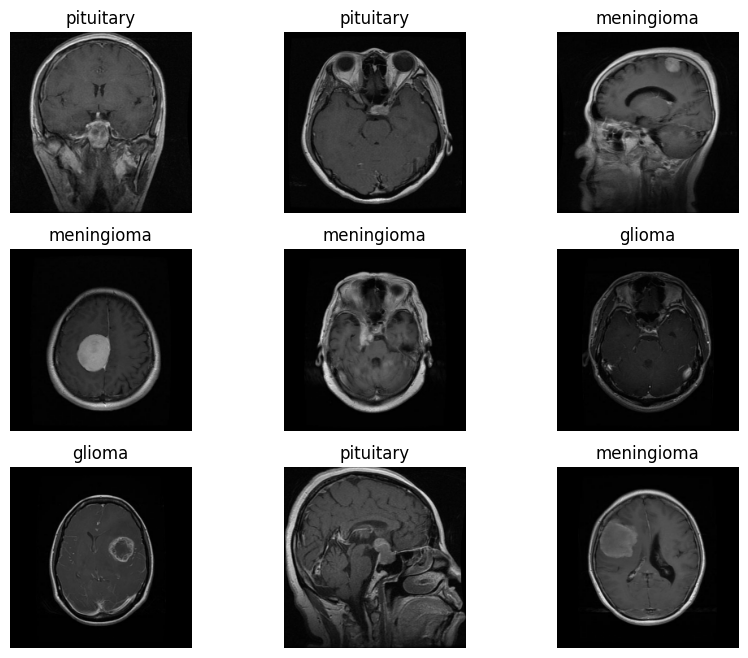

In [ ]:
plt.figure(figsize=(10,8))
for images,labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
# check the batch size
for images ,labels in train_ds.take(1):
    print(f'Images shape {images.shape}')
    print(f'Images Size per batch {labels.shape}')

Images shape (32, 224, 224, 3)
Images Size per batch (32,)


In [ ]:
# now set the data for high perfomance
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_class=len(class_names)

# now create the model


In [ ]:
# 1st start with basic model
model =Sequential(
    [
        layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(256,activation='relu'),
        layers.Dense(num_class,activation='softmax')

    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,234,756 (50.49 MB)

 Trainable params: 13,234,756 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks=EarlyStopping(
    monitor='val_loss',
    min_delta=0.0008,
    patience=4,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
history=model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=20,
                  callbacks=callbacks)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.6315 - loss: 0.8621 - val_accuracy: 0.8055 - val_loss: 0.4717
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8709 - loss: 0.3470 - val_accuracy: 0.8726 - val_loss: 0.3074
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9340 - loss: 0.1867 - val_accuracy: 0.9390 - val_loss: 0.1775
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9681 - loss: 0.0922 - val_accuracy: 0.9657 - val_loss: 0.1188
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9806 - loss: 0.0546 - val_accuracy: 0.9519 - val_loss: 0.1760
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9820 - loss: 0.0483 - val_accuracy: 0.9535 - val_loss: 0.1792
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9812 - loss: 0.0602 - val_accuracy: 0.9703 - val_loss: 0.1004
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9934 - loss: 0.0240 -

In [ ]:
loss,accuracy=model.evaluate(val_ds)
print(f'Model loss {loss:.2f}\nModel Accuracy {accuracy*100:.3f}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9745 - loss: 0.1007
Model loss 0.10
Model Accuracy 97.025


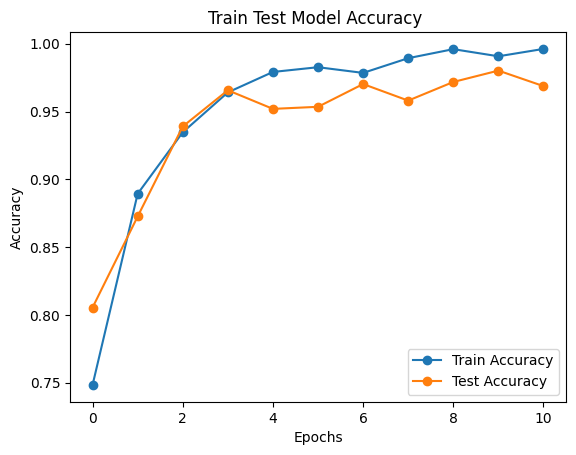

In [ ]:
plt.plot(history.history['accuracy'],label='Train Accuracy',marker='o')
plt.plot(history.history['val_accuracy'],label='Test Accuracy',marker='o')
plt.title('Train Test Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4)

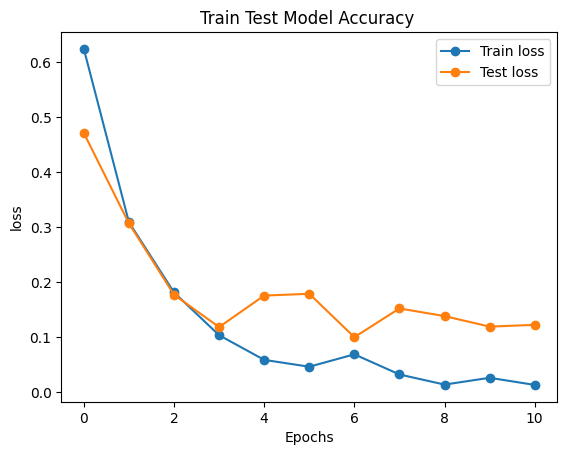

In [ ]:
plt.plot(history.history['loss'],label='Train loss',marker='o')
plt.plot(history.history['val_loss'],label='Test loss',marker='o')
plt.title('Train Test Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


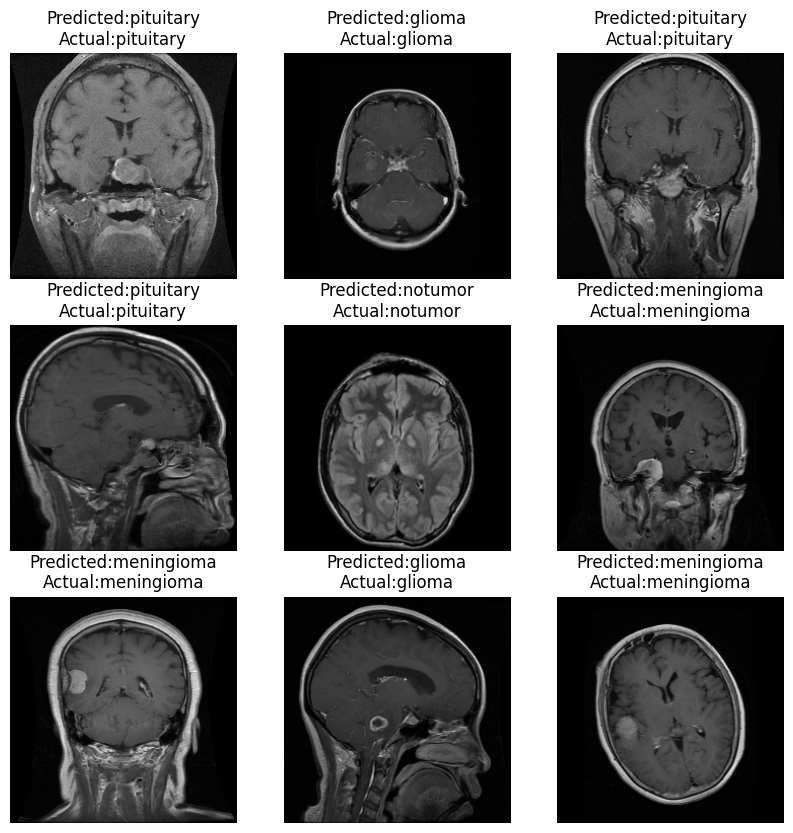

In [ ]:
# now lets try predictions
plt.figure(figsize=(10,10))
for images,labels in val_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        # lets take a single image
        single_img=images[i]
        # add batch input
        img_arr=tf.expand_dims(single_img,axis=0)
        pred=model.predict(img_arr)
        idx=np.argmax(pred[0])
        pred_clas=class_names[idx]
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predicted:{pred_clas}\nActual:{class_names[labels[i]]}')
        plt.axis('off')

# Now Using Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
base_model=VGG19(include_top=False,
                weights='imagenet',
                input_shape=(img_height,img_width,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freeze some layers
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(1024,activation='relu')(x)
predictions=layers.Dense(num_class,activation='softmax')(x)



In [ ]:
model_2=tf.keras.models.Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,553,796 (78.41 MB)

 Trainable params: 529,412 (2.02 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
history=model_2.fit(train_ds,validation_data=val_ds,callbacks=callbacks,epochs=15)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 391ms/step - accuracy: 0.6914 - loss: 1.2579 - val_accuracy: 0.8574 - val_loss: 0.4135
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - accuracy: 0.8491 - loss: 0.4364 - val_accuracy: 0.8902 - val_loss: 0.3158
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.8697 - loss: 0.3597 - val_accuracy: 0.8764 - val_loss: 0.3205
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.8726 - loss: 0.3410 - val_accuracy: 0.8871 - val_loss: 0.2920
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 257ms/step - accuracy: 0.8899 - loss: 0.2773 - val_accuracy: 0.8940 - val_loss: 0.2916
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 259ms/step - accuracy: 0.9043 - loss: 0.2621 - val_accuracy: 0.9169 - val_loss: 0.2191
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - accuracy: 0.8974 - loss: 0.2514 - val_accuracy: 0.9138 - val_loss: 0.2279
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - accuracy: 0.9079 - loss: 0

In [ ]:
loss,accuracy=model_2.evaluate(val_ds,verbose=0)
print(f'Final model Loss {loss:.2f}\nFinal Model Accuracy {accuracy*100:.2f}')

Final model Loss 0.16
Final Model Accuracy 94.28


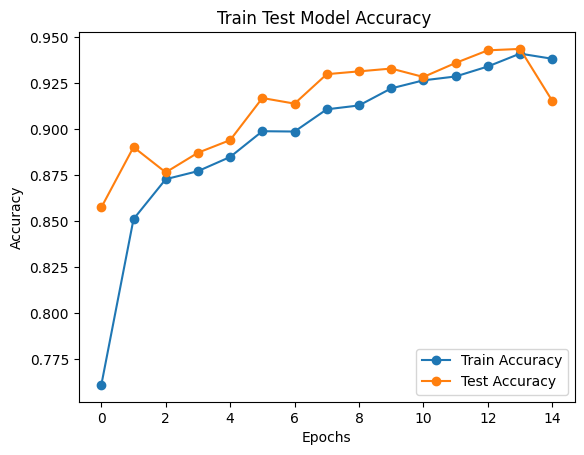

In [ ]:
plt.plot(history.history['accuracy'],label='Train Accuracy',marker='o')
plt.plot(history.history['val_accuracy'],label='Test Accuracy',marker='o')
plt.title('Train Test Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4)

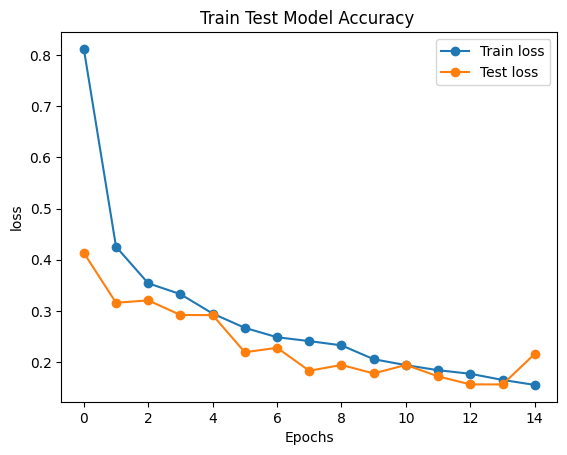

In [ ]:
plt.plot(history.history['loss'],label='Train loss',marker='o')
plt.plot(history.history['val_loss'],label='Test loss',marker='o')
plt.title('Train Test Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc=1)

Generating Grad-CAM for image: /kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0000.jpg
Model Predicted Class: pituitary


/tmp/ipython-input-1313270625.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


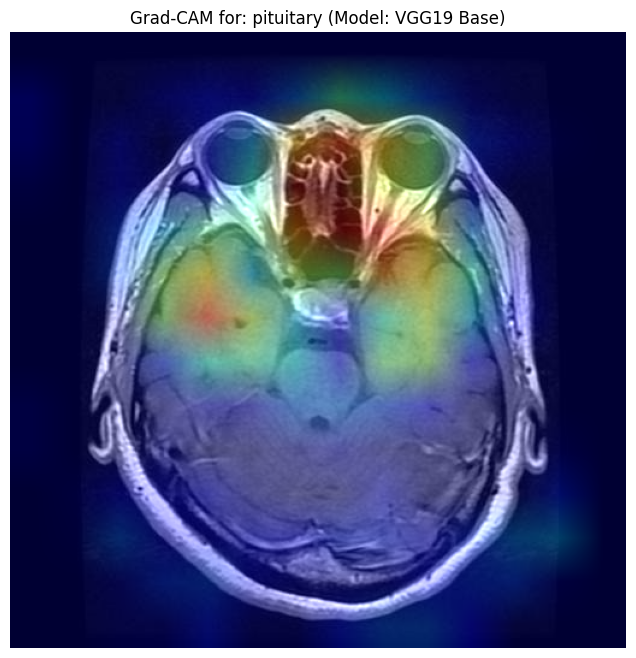

In [ ]:
import matplotlib.cm as cm
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# --- Model Specific Constants ---
CLASSES = ['glioma', 'meningioma', 'notumor', 'pituitary']
IMG_SIZE = (224, 224)
LAST_CONV_LAYER_NAME = 'block5_conv4' # Confirmed for your VGG19 base


# ==============================================================================
# 1. GRAD-CAM CORE FUNCTIONS (For Reference and Copy-Paste)
# ==============================================================================

def get_img_array(img_path, size):
    # Loads an image from path and converts it to a batch array
    img = image.load_img(img_path, target_size=size)
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap_multiclass(img_array, model, last_conv_layer_name, pred_index=None):
    # 1. Create a model that outputs the final conv layer activations and the final prediction
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # 2. Compute the gradient of the predicted class with respect to the last conv layer output
    with tf.GradientTape() as tape:
        img_array_f32 = tf.cast(img_array, tf.float32)
        last_conv_layer_output, preds = grad_model(img_array_f32)

        if pred_index is None:
            pred_index = tf.argmax(preds[0])

        class_channel = preds[:, pred_index]

    # Get the gradient of the target class with respect to the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # 3. Compute the mean intensity of the gradient over all feature map channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 4. Create the heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 5. Apply ReLU and normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy(), pred_index.numpy()

def save_and_display_gradcam(img_path, heatmap, prediction_class, cam_path="vgg19_grad_cam_output.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img_array = keras.utils.img_to_array(img)

    # Get the target dimensions for resizing
    img_height, img_width = img_array.shape[0], img_array.shape[1]

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use a color map (MatplotlibDeprecationWarning acknowledged but harmless for functionality)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # ----------------------------------------------------------------------
    # *** CRITICAL FIX: Resizing the Heatmap Array using tf.image.resize ***
    # ----------------------------------------------------------------------

    # Convert the heatmap array to a TensorFlow tensor
    jet_heatmap = tf.convert_to_tensor(jet_heatmap, dtype=tf.float32)

    # Resize the heatmap to the original image dimensions
    jet_heatmap = tf.image.resize(
        jet_heatmap,
        (img_height, img_width),
        method='bilinear'
    )

    # Convert back to NumPy array for superposition
    jet_heatmap = jet_heatmap.numpy() * 255.0 # Scale to 0-255

    # Superimpose the heatmap on the original image (need to ensure dtypes are compatible)
    # The original image array needs to be converted to float for blending
    superimposed_img = jet_heatmap * alpha + img_array

    # Ensure all values are within 0-255 and cast to integer for saving/displaying
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")

    superimposed_img_pil = keras.utils.array_to_img(superimposed_img)

    superimposed_img_pil.save(cam_path)

    # Plotting the result
    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img_pil)
    plt.title(f"Grad-CAM for: {prediction_class} (Model: VGG19 Base)")
    plt.axis('off')
    plt.show()



# ==============================================================================
# 2. EXECUTION BLOCK - RUN THIS AFTER TRAINING
# ==============================================================================

# *** IMPORTANT: Replace this with the actual path to an image from your test set ***
# Choose an image where your model made a correct prediction for the best insight.
example_img_path = '/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0000.jpg'

# Assuming your trained model object is named 'model'
if 'model' not in locals():
    print("Error: The trained 'model' object is not found. Please train the model first!")
else:
    print(f"Generating Grad-CAM for image: {example_img_path}")
    try:
        # 1. Get the image array
        img_array = get_img_array(example_img_path, size=IMG_SIZE)

        # 2. Predict the class and generate the heatmap
        heatmap, predicted_index = make_gradcam_heatmap_multiclass(
            img_array,
            model_2,
            LAST_CONV_LAYER_NAME
        )

        # 3. Get the class name for the title
        predicted_class_name = CLASSES[predicted_index]
        print(f"Model Predicted Class: {predicted_class_name}")

        # 4. Display the result
        save_and_display_gradcam(example_img_path, heatmap, predicted_class_name)

    except Exception as e:
        print("\n--- ERROR DURING GRAD-CAM EXECUTION ---")
        print(f"Please check the file path. Error details: {e}")

In [ ]:
model_2.save('Brain_tumor_Model.h5')
print('Model Saved Successfully')

Model Saved Successfully
